In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


In [ ]:
# prompt: load kaggle data

# Assuming you have your Kaggle API key set up in your environment.
!pip install kaggle

# Replace 'username/dataset' with your actual Kaggle dataset path
!kaggle datasets download -d noorsaeed/resume-datasets

# Unzip the downloaded dataset (adjust the filename if needed)
!unzip resume-datasets.zip


Dataset URL: https://www.kaggle.com/datasets/noorsaeed/resume-datasets
License(s): MIT
 94% 134M/142M [00:02<00:00, 81.2MB/s]
100% 142M/142M [00:02<00:00, 63.5MB/s]
Archive:  resume-datasets.zip
  inflating: clean_resume_data.csv   
  inflating: jobs_dataset_with_features.csv  


In [ ]:
df=pd.read_csv('/content/clean_resume_data.csv')

In [ ]:
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [ ]:
df.shape

(2484, 3)

In [ ]:
df.isnull().sum()

,0
ID,0
Category,0
Feature,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(2483, 3)

In [ ]:
df.duplicated().sum()

0

# EDA

In [ ]:
df['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,119
FINANCE,118
ADVOCATE,118
ACCOUNTANT,118
ENGINEERING,118
CHEF,118
AVIATION,117
FITNESS,117


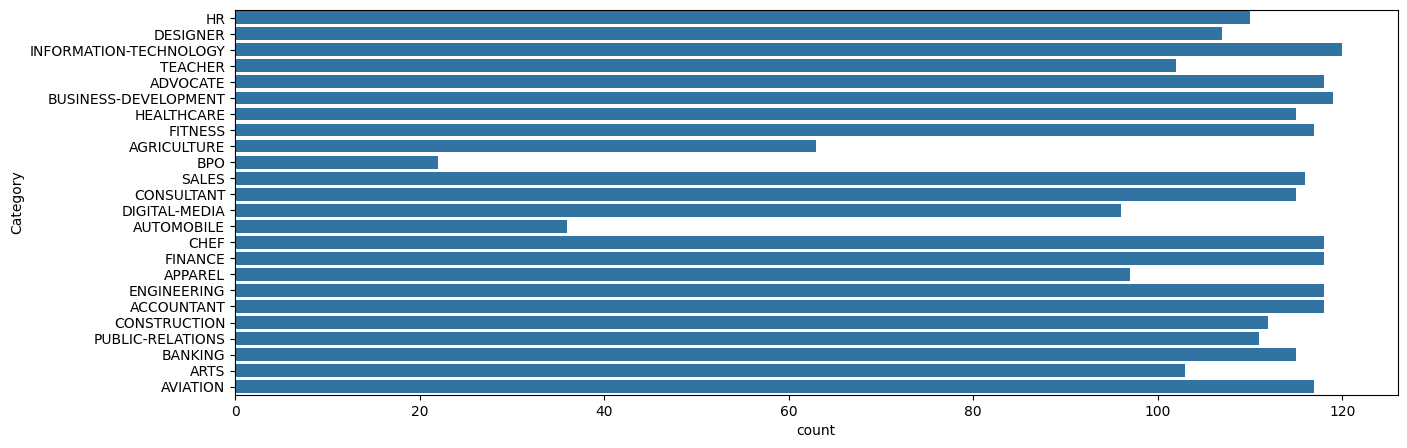

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Category',data=df,orient='h')
plt.show()

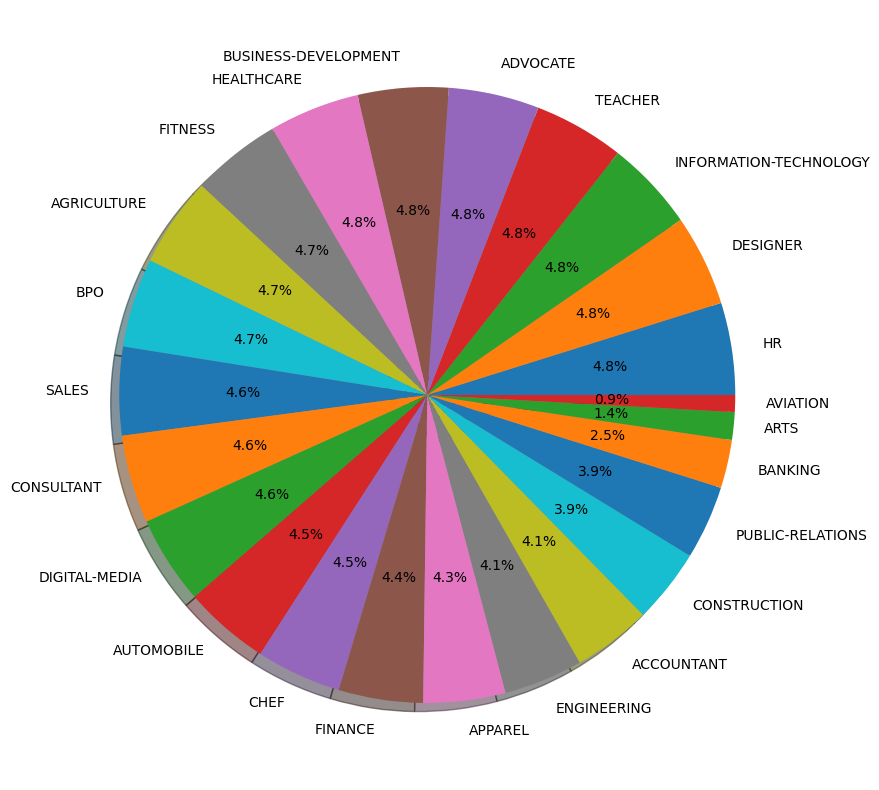

In [ ]:
label=df['Category'].unique()
counts=df['Category'].value_counts()

plt.figure(figsize=(15,10))
plt.pie(counts,labels=label,autopct='%1.1f%%',shadow=True)
plt.show()

#balancing dataset

In [ ]:
from sklearn.utils import resample

max_count=df['Category'].value_counts().max()
balanced_data=[]

for category in df['Category'].unique():
    category_data=df[df['Category']==category]
    if len(category_data)<max_count:
        b_c_d=resample(category_data,replace=True,n_samples=max_count,random_state=42)
    else:
        b_c_d=resample(category_data,replace=True,n_samples=max_count,random_state=42)
    balanced_data.append(b_c_d)

balanced_df=pd.concat(balanced_data)

In [ ]:
balanced_df['Category'].value_counts()

,count
Category,
HR,120
DESIGNER,120
ARTS,120
BANKING,120
PUBLIC-RELATIONS,120
CONSTRUCTION,120
ACCOUNTANT,120
ENGINEERING,120
APPAREL,120


# train test split

In [ ]:
x=balanced_df['Feature']
y=balanced_df['Category']

In [ ]:
x

,Feature
102,hr personnel assistant summary u citizen autho...
51,hr assistant summary hard worker dedicated det...
92,global hr manager summary global hr profession...
14,hr coordinator summary applicant screening bac...
106,designation hr assistant professional summary ...
...,...
2390,aviation fuel quality control specialist profe...
2392,superintendent ii summary solutions focused ve...
2455,assistant cfo professional summary dedicated f...
2426,tso floater career overview obtain position fa...


In [ ]:
y

,Category
102,HR
51,HR
92,HR
14,HR
106,HR
...,...
2390,AVIATION
2392,AVIATION
2455,AVIATION
2426,AVIATION


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# vectorization

In [ ]:
tfidf=TfidfVectorizer()
x_train_vec=tfidf.fit_transform(x_train)
x_test_vec=tfidf.transform(x_test)

# train model

In [ ]:
from sklearn.metrics import classification_report
rf=RandomForestClassifier()
rf.fit(x_train_vec,y_train)

y_pred=rf.predict(x_test_vec)

accuracy=accuracy_score(y_test,y_pred)
print('accuracy is ',accuracy)

accuracy is  0.8697916666666666


In [ ]:
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.73      0.95      0.83        20
              ADVOCATE       0.75      0.72      0.74        29
           AGRICULTURE       0.95      0.91      0.93        23
               APPAREL       0.89      0.73      0.80        22
                  ARTS       1.00      0.67      0.80        24
            AUTOMOBILE       1.00      0.68      0.81        19
              AVIATION       0.89      0.89      0.89        28
               BANKING       0.93      0.64      0.76        22
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.71      0.83      0.77        18
                  CHEF       0.80      1.00      0.89        28
          CONSTRUCTION       0.89      1.00      0.94        25
            CONSULTANT       1.00      0.87      0.93        31
              DESIGNER       0.87      0.96      0.92        28
         DIGITAL-MEDIA       0.87      

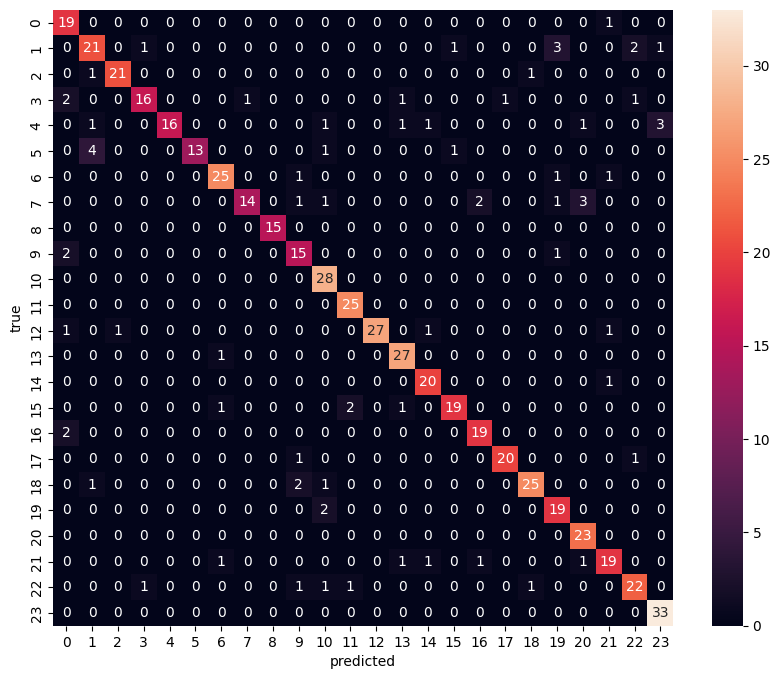

In [ ]:
cf_mat=confusion_matrix(y_test,y_pred)
# print(cf_mat)
plt.figure(figsize=(10,8))
sns.heatmap(cf_mat,annot=True)
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train_vec,y_train)

y_pred=lr.predict(x_test_vec)

accuracy=accuracy_score(y_test,y_pred)
print('accuracy is ',accuracy)

accuracy is  0.7777777777777778


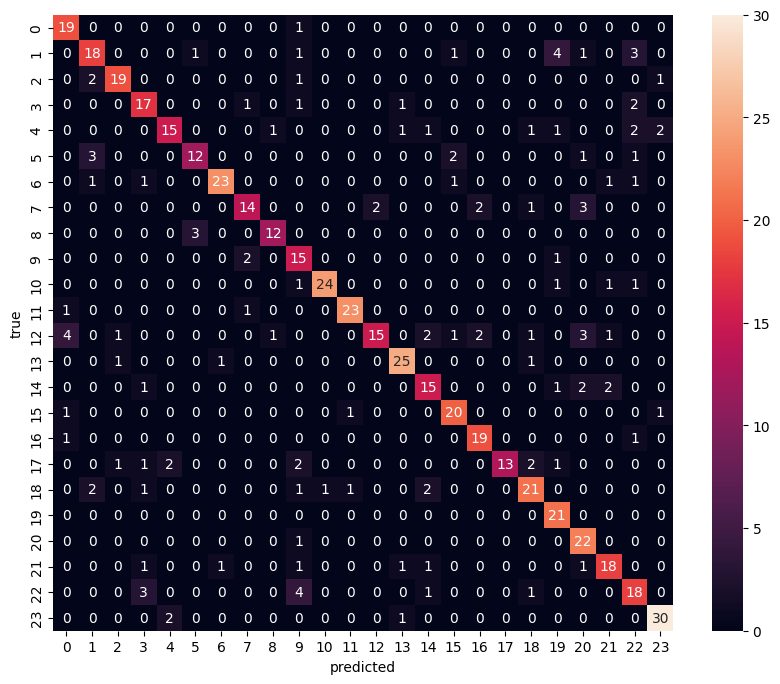

In [ ]:
cf_mat=confusion_matrix(y_test,y_pred)
# print(cf_mat)
plt.figure(figsize=(10,8))
sns.heatmap(cf_mat,annot=True)
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [ ]:
import pickle

# Open a file in write binary mode ('wb')
with open('random_forest_model.pkl', 'wb') as file:
    # Dump the 'rf' object into the file
    pickle.dump(rf, file)

# Open another file for the tfidf vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    # Dump the 'tfidf' object into the file
    pickle.dump(tfidf, file)

# Resume Job Recommendation

In [ ]:
df=pd.read_csv('/content/jobs_dataset_with_features.csv')

In [ ]:
df.head()

,Role,Features
0,Social Media Manager,5 to 15 Years Digital Marketing Specialist M.T...
1,Frontend Web Developer,"2 to 12 Years Web Developer BCA HTML, CSS, Jav..."
2,Quality Control Manager,0 to 12 Years Operations Manager PhD Quality c...
3,Wireless Network Engineer,4 to 11 Years Network Engineer PhD Wireless ne...
4,Conference Manager,1 to 12 Years Event Manager MBA Event planning...


In [ ]:
df.shape

(1615940, 2)

In [ ]:
df['Role'].value_counts()

,count
Role,
Interaction Designer,20580
Network Administrator,17470
User Interface Designer,14036
Social Media Manager,13945
User Experience Designer,13935
...,...
Inventory Control Specialist,3342
Budget Analyst,3335
Clinical Nurse Manager,3324


In [ ]:
m_c=6500
r_c=df['Role'].value_counts()
droppes_class=r_c[r_c<m_c].index
f_df=df[~df['Role'].isin(droppes_class)].reset_index(drop=True)

f_df['Role'].value_counts()

,count
Role,
Interaction Designer,20580
Network Administrator,17470
User Interface Designer,14036
Social Media Manager,13945
User Experience Designer,13935
...,...
Benefits Coordinator,6839
Research Analyst,6830
Administrative Coordinator,6803


In [ ]:
f_df.size

1041384

In [ ]:
df=f_df.sample(n=10000)

In [ ]:
df.shape

(10000, 2)

In [ ]:
df

,Role,Features
36631,Demand Planner,4 to 9 Years Supply Chain Manager B.Tech Deman...
316672,Financial Analyst,4 to 11 Years Investment Banker PhD Financial ...
131766,User Experience Designer,0 to 9 Years UX/UI Designer MBA User-centered ...
440891,Investment Advisor,0 to 11 Years Financial Advisor BA Investment ...
452331,Procurement Analyst,2 to 15 Years Procurement Manager MBA Procurem...
...,...,...
244057,Paralegal,0 to 8 Years Legal Assistant M.Tech Legal rese...
120752,Procurement Manager,4 to 15 Years Procurement Specialist B.Tech Pr...
50513,Retirement Planner,1 to 11 Years Financial Advisor M.Com Retireme...
169237,SEO Specialist,4 to 15 Years Digital Marketing Specialist BBA...


In [ ]:
x=df['Features']
y=df['Role']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
tfidf_vec=TfidfVectorizer()
x_train_tfidf=tfidf_vec.fit_transform(x_train)
x_test_tfidf=tfidf_vec.transform(x_test)

In [ ]:
rf_cli=RandomForestClassifier()
rf_cli.fit(x_train_tfidf,y_train)

y_pred=rf_cli.predict(x_test_tfidf)

accuracy=accuracy_score(y_test,y_pred)
print('accuracy is ',accuracy)

accuracy is  1.0


In [ ]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

def prediction_category(txt):
    res_txt=cleanResume(txt)
    res_tfidf=tfidf_vec.transform([res_txt])
    res_rf=rf_cli.predict(res_tfidf)[0]
    return res_rf

In [ ]:
tt="""Objective:
Dedicated and results-oriented Banking professional with a strong background in financial analysis and customer service seeking opportunities to contribute to a reputable financial institution. Eager to leverage expertise in risk management, investment strategies, and relationship building to drive business growth and client satisfaction.

Education:
- Bachelor of Business Administration in Finance, XYZ University, GPA: 3.8/4.0
- Certified Financial Analyst (CFA) Level I Candidate

Skills:
- Proficient in financial modeling and analysis using Excel, Bloomberg Terminal, and other financial software
- Extensive knowledge of banking products and services, including loans, mortgages, and investment products
- Strong understanding of regulatory compliance and risk management practices in the banking industry
- Excellent communication and interpersonal skills, with a focus on building rapport with clients and colleagues
- Ability to work efficiently under pressure and adapt to changing market conditions

Experience:
Financial Analyst | ABC Bank
- Conducted financial analysis and risk assessment for corporate clients, including credit analysis, financial statement analysis, and cash flow modeling
- Developed customized financial solutions to meet clients' needs and objectives, resulting in increased revenue and client retention
- Collaborated with cross-functional teams to identify new business opportunities and optimize existing processes

Customer Service Representative | DEF Bank
- Provided exceptional customer service to bank clients, addressing inquiries, resolving issues, and promoting banking products and services
- Processed transactions accurately and efficiently, including deposits, withdrawals, and account transfers
- Educated customers on various banking products and services, helping them make informed financial decisions

Internship | GHI Investments
- Assisted portfolio managers with investment research and analysis, including industry and company-specific research, financial modeling, and performance analysis
- Prepared investment presentations and reports for clients, highlighting investment opportunities and performance metrics
- Conducted market research and analysis to identify trends and opportunities in the financial markets

Certifications:
- Certified Financial Planner (CFP)
- Series 7 and Series 63 Securities Licenses

Languages:
- English (Native)
- Spanish (Proficient)
"""

In [ ]:
prediction_category(tt)

'Financial Analyst'

In [ ]:
import pickle
pickle.dump(rf_cli,open('rf_clsi_job.pkl','wb'))
pickle.dump(tfidf_vec,open('vectorizer_job_rec.pkl','wb'))